### libs and data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [69]:
import yfinance as yf

tk = yf.Tickers(['^IXIC','^GSPC'])
df = tk.history(period="max", interval="1h", auto_adjust=False)

print(f"{df.shape = }")
print(df.head().to_string())

[*********************100%***********************]  2 of 2 completed

df.shape = (3486, 16)
Price                        Adj Close                      Close               Dividends               High                        Low                       Open               Stock Splits           Volume           
Ticker                           ^GSPC         ^IXIC        ^GSPC         ^IXIC     ^GSPC ^IXIC        ^GSPC         ^IXIC        ^GSPC         ^IXIC        ^GSPC         ^IXIC        ^GSPC ^IXIC      ^GSPC      ^IXIC
Datetime                                                                                                                                                                                                                 
2023-11-02 14:30:00+00:00  4298.169922  13238.137695  4298.169922  13238.137695       0.0   0.0  4304.350098  13262.368164  4292.709961  13212.522461  4293.040039  13228.905273          0.0   0.0          0          0
2023-11-02 15:30:00+00:00  4298.180176  13235.206055  4298.180176  13235.206055       0.0   0.0  4303.5800

In [74]:
ndq_bars = df.xs('^IXIC', level=1, axis=1)
ndq_bars.columns = [c.lower().replace(' ', '_') for c in ndq_bars.columns]
print(ndq_bars.shape)
print(ndq_bars.head().to_string())

(3486, 8)
                              adj_close         close  dividends          high           low          open  stock_splits     volume
Datetime                                                                                                                           
2023-11-02 14:30:00+00:00  13238.137695  13238.137695        0.0  13262.368164  13212.522461  13228.905273           0.0          0
2023-11-02 15:30:00+00:00  13235.206055  13235.206055        0.0  13255.201172  13223.034180  13238.797852           0.0  436751000
2023-11-02 16:30:00+00:00  13259.929688  13259.929688        0.0  13267.633789  13229.541016  13235.282227           0.0  365127000
2023-11-02 17:30:00+00:00  13284.075195  13284.075195        0.0  13285.522461  13260.075195  13260.075195           0.0  369392000
2023-11-02 18:30:00+00:00  13287.302734  13287.302734        0.0  13297.585938  13278.409180  13283.580078           0.0  460566000


In [75]:
snp_bars = df.xs('^GSPC', level=1, axis=1)
snp_bars.columns = [c.lower().replace(' ', '_') for c in snp_bars.columns]
print(snp_bars.shape)
print(snp_bars.head().to_string())

(3486, 8)
                             adj_close        close  dividends         high          low         open  stock_splits     volume
Datetime                                                                                                                      
2023-11-02 14:30:00+00:00  4298.169922  4298.169922        0.0  4304.350098  4292.709961  4293.040039           0.0          0
2023-11-02 15:30:00+00:00  4298.180176  4298.180176        0.0  4303.580078  4295.729980  4298.120117           0.0  258768176
2023-11-02 16:30:00+00:00  4307.100098  4307.100098        0.0  4308.649902  4297.319824  4298.140137           0.0  226964000
2023-11-02 17:30:00+00:00  4312.439941  4312.439941        0.0  4314.689941  4307.109863  4307.109863           0.0  229619000
2023-11-02 18:30:00+00:00  4313.609863  4313.609863        0.0  4316.169922  4311.020020  4312.459961           0.0  285691000


In [97]:
import pandas_datareader.data as web
import datetime

start = snp_bars.index.min().date() - datetime.timedelta(days=365/2)
end = snp_bars.index.max().date()

econs = web.DataReader(['GDP','UNRATE','CPIAUCSL','FEDFUNDS'], 'fred', start, end)
print(econs.shape)
print(econs.head().to_string())

(28, 4)
                  GDP  UNRATE  CPIAUCSL  FEDFUNDS
DATE                                             
2023-06-01        NaN     3.6   304.099      5.08
2023-07-01  28074.846     3.5   304.615      5.12
2023-08-01        NaN     3.7   306.138      5.33
2023-09-01        NaN     3.8   307.374      5.33
2023-10-01  28424.722     3.9   307.653      5.33


### time series operations

In [82]:
snp_bars.index

DatetimeIndex(['2023-11-02 14:30:00+00:00', '2023-11-02 15:30:00+00:00',
               '2023-11-02 16:30:00+00:00', '2023-11-02 17:30:00+00:00',
               '2023-11-02 18:30:00+00:00', '2023-11-02 19:30:00+00:00',
               '2023-11-03 13:30:00+00:00', '2023-11-03 14:30:00+00:00',
               '2023-11-03 15:30:00+00:00', '2023-11-03 16:30:00+00:00',
               ...
               '2025-10-30 17:30:00+00:00', '2025-10-30 18:30:00+00:00',
               '2025-10-30 19:30:00+00:00', '2025-10-31 13:30:00+00:00',
               '2025-10-31 14:30:00+00:00', '2025-10-31 15:30:00+00:00',
               '2025-10-31 16:30:00+00:00', '2025-10-31 17:30:00+00:00',
               '2025-10-31 18:30:00+00:00', '2025-10-31 19:30:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Datetime', length=3486, freq=None)

In [84]:
print(snp_bars.head().to_string())

                             adj_close        close  dividends         high          low         open  stock_splits     volume
Datetime                                                                                                                      
2023-11-02 14:30:00+00:00  4298.169922  4298.169922        0.0  4304.350098  4292.709961  4293.040039           0.0          0
2023-11-02 15:30:00+00:00  4298.180176  4298.180176        0.0  4303.580078  4295.729980  4298.120117           0.0  258768176
2023-11-02 16:30:00+00:00  4307.100098  4307.100098        0.0  4308.649902  4297.319824  4298.140137           0.0  226964000
2023-11-02 17:30:00+00:00  4312.439941  4312.439941        0.0  4314.689941  4307.109863  4307.109863           0.0  229619000
2023-11-02 18:30:00+00:00  4313.609863  4313.609863        0.0  4316.169922  4311.020020  4312.459961           0.0  285691000


In [102]:
snp_bars.loc['2023-11-02']

,adj_close,close,dividends,high,low,open,stock_splits,volume
Datetime,,,,,,,,
2023-11-02 14:30:00+00:00,4298.169922,4298.169922,0.0,4304.350098,4292.709961,4293.040039,0.0,0
2023-11-02 15:30:00+00:00,4298.180176,4298.180176,0.0,4303.580078,4295.729980,4298.120117,0.0,258768176
2023-11-02 16:30:00+00:00,4307.100098,4307.100098,0.0,4308.649902,4297.319824,4298.140137,0.0,226964000
2023-11-02 17:30:00+00:00,4312.439941,4312.439941,0.0,4314.689941,4307.109863,4307.109863,0.0,229619000
2023-11-02 18:30:00+00:00,4313.609863,4313.609863,0.0,4316.169922,4311.020020,4312.459961,0.0,285691000
2023-11-02 19:30:00+00:00,4317.959961,4317.959961,0.0,4319.720215,4313.410156,4313.669922,0.0,441140000


In [143]:
snp_bars.at_time(datetime.time(14,30)).head(10)

,adj_close,close,dividends,high,low,open,stock_splits,volume
Datetime,,,,,,,,
2023-11-02 14:30:00+00:00,4298.169922,4298.169922,0.0,4304.350098,4292.709961,4293.040039,0.0,0
2023-11-03 14:30:00+00:00,4350.439941,4350.439941,0.0,4353.870117,4343.589844,4349.069824,0.0,341329357
2023-11-06 14:30:00+00:00,4363.479980,4363.479980,0.0,4372.209961,4358.399902,4364.270020,0.0,0
2023-11-07 14:30:00+00:00,4375.180176,4375.180176,0.0,4375.180176,4355.410156,4366.209961,0.0,0
2023-11-08 14:30:00+00:00,4379.649902,4379.649902,0.0,4391.200195,4377.830078,4384.370117,0.0,0
2023-11-09 14:30:00+00:00,4374.209961,4374.209961,0.0,4393.399902,4373.470215,4391.410156,0.0,0
2023-11-10 14:30:00+00:00,4357.029785,4357.029785,0.0,4370.160156,4355.259766,4364.149902,0.0,400512868
2023-11-13 14:30:00+00:00,4400.970215,4400.970215,0.0,4406.660156,4393.819824,4406.660156,0.0,0
2023-11-14 14:30:00+00:00,4496.379883,4496.379883,0.0,4496.700195,4458.970215,4458.970215,0.0,0


In [112]:
snp_bars.close['2025-10-31']

Datetime
2025-10-31 13:30:00+00:00    6853.950195
2025-10-31 14:30:00+00:00    6859.359863
2025-10-31 15:30:00+00:00    6838.930176
2025-10-31 16:30:00+00:00    6819.569824
2025-10-31 17:30:00+00:00    6844.779785
2025-10-31 18:30:00+00:00    6862.609863
2025-10-31 19:30:00+00:00    6840.229980
Name: close, dtype: float64

In [130]:
snp_bars.close

Datetime
2023-11-02 14:30:00+00:00    4298.169922
2023-11-02 15:30:00+00:00    4298.180176
2023-11-02 16:30:00+00:00    4307.100098
2023-11-02 17:30:00+00:00    4312.439941
2023-11-02 18:30:00+00:00    4313.609863
                                ...     
2025-10-31 15:30:00+00:00    6838.930176
2025-10-31 16:30:00+00:00    6819.569824
2025-10-31 17:30:00+00:00    6844.779785
2025-10-31 18:30:00+00:00    6862.609863
2025-10-31 19:30:00+00:00    6840.229980
Name: close, Length: 3486, dtype: float64

In [136]:
mth_mean = snp_bars.close.resample('ME').agg(['mean', 'median', 'std'])
mth_mean

,mean,median,std
Datetime,,,
2023-11-30 00:00:00+00:00,4467.673550,4504.240234,84.937519
2023-12-31 00:00:00+00:00,4683.014941,4714.909912,83.876101
2024-01-31 00:00:00+00:00,4801.462313,4779.220215,72.523352
2024-02-29 00:00:00+00:00,5007.517446,5002.734863,58.464198
2024-03-31 00:00:00+00:00,5170.335864,5160.114990,51.163925
2024-04-30 00:00:00+00:00,5117.753453,5112.255127,80.098633
2024-05-31 00:00:00+00:00,5232.712735,5243.800049,81.844277
2024-06-30 00:00:00+00:00,5412.184504,5432.810059,70.574003
2024-07-31 00:00:00+00:00,5541.161722,5552.430176,67.447936


<Axes: xlabel='Datetime'>

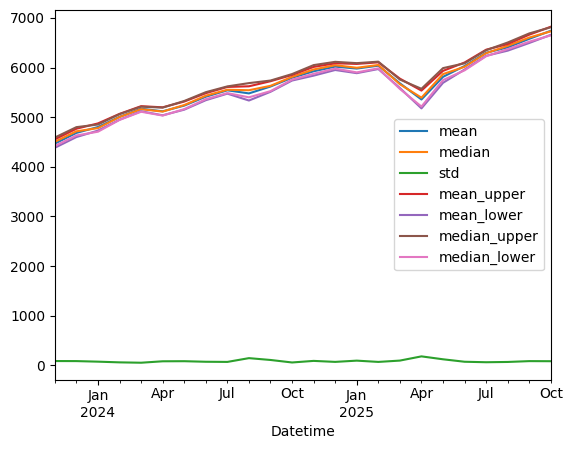

In [158]:
mth_mean.plot()

Text(0.5, 1.0, 'S&P 500 Monthly Close Price Mean and Median with Standard Deviation Bands')

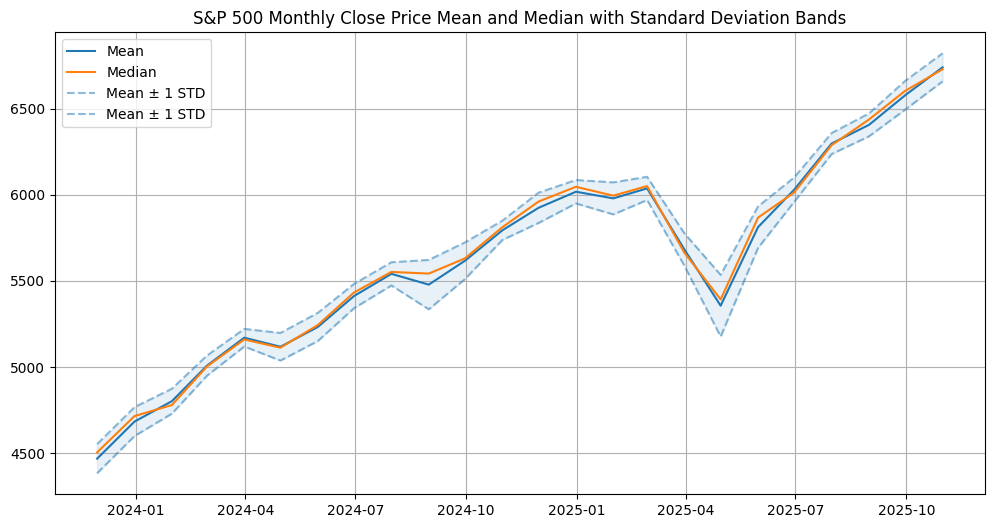

In [157]:
mth_mean['mean_upper'] = mth_mean['mean'] + mth_mean['std']
mth_mean['mean_lower'] = mth_mean['mean'] - mth_mean['std']
mth_mean['median_upper'] = mth_mean['median'] + mth_mean['std']
mth_mean['median_lower'] = mth_mean['median'] - mth_mean['std']

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(mth_mean.index, mth_mean[['mean','median']], label=['Mean','Median'])
ax.plot(mth_mean.index, mth_mean[['mean_upper','mean_lower']], linestyle='--', color='C0', alpha=0.5, label='Mean ± 1 STD')
ax.fill_between(mth_mean.index, mth_mean['mean_lower'], mth_mean['mean_upper'], color='C0', alpha=0.1)

ax.legend()
ax.grid()
ax.set_title('S&P 500 Monthly Close Price Mean and Median with Standard Deviation Bands')

In [159]:
close = snp_bars.close
close / close.shift(1) - 1

Datetime
2023-11-02 14:30:00+00:00         NaN
2023-11-02 15:30:00+00:00    0.000002
2023-11-02 16:30:00+00:00    0.002075
2023-11-02 17:30:00+00:00    0.001240
2023-11-02 18:30:00+00:00    0.000271
                               ...   
2025-10-31 15:30:00+00:00   -0.002978
2025-10-31 16:30:00+00:00   -0.002831
2025-10-31 17:30:00+00:00    0.003697
2025-10-31 18:30:00+00:00    0.002605
2025-10-31 19:30:00+00:00   -0.003261
Name: close, Length: 3486, dtype: float64

In [171]:
close.shift(1).head()

Datetime
2023-11-02 14:30:00+00:00            NaN
2023-11-02 15:30:00+00:00    4298.169922
2023-11-02 16:30:00+00:00    4298.180176
2023-11-02 17:30:00+00:00    4307.100098
2023-11-02 18:30:00+00:00    4312.439941
Name: close, dtype: float64

<Axes: xlabel='Datetime'>

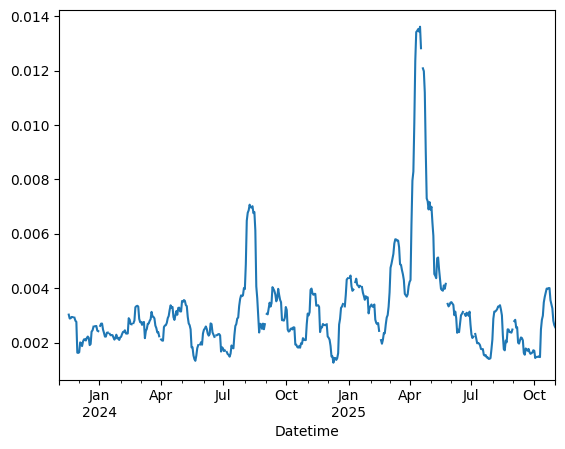

In [214]:
hourly_returns = snp_bars.close.pct_change()
std_10day = hourly_returns.rolling(window=10*7).std()
std_10day.resample('B').last().plot()

### data alignment

In [218]:
ts1 = snp_bars.close.head(10)
ts1

Datetime
2023-11-02 14:30:00+00:00    4298.169922
2023-11-02 15:30:00+00:00    4298.180176
2023-11-02 16:30:00+00:00    4307.100098
2023-11-02 17:30:00+00:00    4312.439941
2023-11-02 18:30:00+00:00    4313.609863
2023-11-02 19:30:00+00:00    4317.959961
2023-11-03 13:30:00+00:00    4348.879883
2023-11-03 14:30:00+00:00    4350.439941
2023-11-03 15:30:00+00:00    4366.430176
2023-11-03 16:30:00+00:00    4361.390137
Name: close, dtype: float64

In [227]:
ts2 = ts1.sample(frac=0.9, random_state=42)
ts2

Datetime
2023-11-03 15:30:00+00:00    4366.430176
2023-11-02 15:30:00+00:00    4298.180176
2023-11-02 19:30:00+00:00    4317.959961
2023-11-02 14:30:00+00:00    4298.169922
2023-11-03 14:30:00+00:00    4350.439941
2023-11-02 16:30:00+00:00    4307.100098
2023-11-03 16:30:00+00:00    4361.390137
2023-11-02 18:30:00+00:00    4313.609863
2023-11-02 17:30:00+00:00    4312.439941
Name: close, dtype: float64

In [237]:
ts1 + ts2

Datetime
2023-11-02 14:30:00+00:00    8596.339844
2023-11-02 15:30:00+00:00    8596.360352
2023-11-02 16:30:00+00:00    8614.200195
2023-11-02 17:30:00+00:00    8624.879883
2023-11-02 18:30:00+00:00    8627.219727
2023-11-02 19:30:00+00:00    8635.919922
2023-11-03 13:30:00+00:00            NaN
2023-11-03 14:30:00+00:00    8700.879883
2023-11-03 15:30:00+00:00    8732.860352
2023-11-03 16:30:00+00:00    8722.780273
Name: close, dtype: float64

In [261]:
f1 = snp_bars.close.sample(frac=0.9, random_state=42)
f2 = ndq_bars.close.sample(frac=0.95, random_state=42)
    
both = pd.concat([f1, f2],axis=1, keys=['snp','ndq'])
both.head()

,snp,ndq
Datetime,,
2023-11-02 14:30:00+00:00,4298.169922,13238.137695
2023-11-02 15:30:00+00:00,NaN,13235.206055
2023-11-02 16:30:00+00:00,4307.100098,13259.929688
2023-11-02 17:30:00+00:00,4312.439941,13284.075195
2023-11-02 18:30:00+00:00,4313.609863,13287.302734


### missing data 

In [275]:
df = both.head(20).copy()
df['ndq'] = df['ndq'].sample(frac=0.9, random_state=42)
df

,snp,ndq
Datetime,,
2023-11-02 14:30:00+00:00,4298.169922,13238.137695
2023-11-02 15:30:00+00:00,NaN,13235.206055
2023-11-02 16:30:00+00:00,4307.100098,13259.929688
2023-11-02 17:30:00+00:00,4312.439941,13284.075195
2023-11-02 18:30:00+00:00,4313.609863,13287.302734
2023-11-02 19:30:00+00:00,4317.959961,13294.866211
2023-11-03 13:30:00+00:00,4348.879883,NaN
2023-11-03 14:30:00+00:00,4350.439941,13415.411133
2023-11-03 15:30:00+00:00,4366.430176,13482.062500


In [276]:
both.count()

snp    3137
ndq    3312
dtype: int64

In [277]:
df.mean(1)

Datetime
2023-11-02 14:30:00+00:00     8768.153809
2023-11-02 15:30:00+00:00    13235.206055
2023-11-02 16:30:00+00:00     8783.514893
2023-11-02 17:30:00+00:00     8798.257568
2023-11-02 18:30:00+00:00     8800.456299
2023-11-02 19:30:00+00:00     8806.413086
2023-11-03 13:30:00+00:00     4348.879883
2023-11-03 14:30:00+00:00     8882.925537
2023-11-03 15:30:00+00:00     8924.246338
2023-11-03 16:30:00+00:00     8913.739014
2023-11-03 17:30:00+00:00     8933.814941
2023-11-03 18:30:00+00:00     8928.676514
2023-11-03 19:30:00+00:00     8917.667236
2023-11-06 14:30:00+00:00     8935.913330
2023-11-06 15:30:00+00:00     4365.200195
2023-11-06 16:30:00+00:00     8929.519775
2023-11-06 17:30:00+00:00     8900.753662
2023-11-06 18:30:00+00:00     8910.275635
2023-11-06 19:30:00+00:00     8929.788574
2023-11-06 20:30:00+00:00     8944.014404
dtype: float64

In [278]:
df.dropna(how='all')

,snp,ndq
Datetime,,
2023-11-02 14:30:00+00:00,4298.169922,13238.137695
2023-11-02 15:30:00+00:00,NaN,13235.206055
2023-11-02 16:30:00+00:00,4307.100098,13259.929688
2023-11-02 17:30:00+00:00,4312.439941,13284.075195
2023-11-02 18:30:00+00:00,4313.609863,13287.302734
2023-11-02 19:30:00+00:00,4317.959961,13294.866211
2023-11-03 13:30:00+00:00,4348.879883,NaN
2023-11-03 14:30:00+00:00,4350.439941,13415.411133
2023-11-03 15:30:00+00:00,4366.430176,13482.062500


In [ ]:
df.fillna(df.mean())

,snp,ndq
Datetime,,
2023-11-02 14:30:00+00:00,4298.169922,13238.137695
2023-11-02 15:30:00+00:00,4346.901033,13235.206055
2023-11-02 16:30:00+00:00,4307.100098,13259.929688
2023-11-02 17:30:00+00:00,4312.439941,13284.075195
2023-11-02 18:30:00+00:00,4313.609863,13287.302734
2023-11-02 19:30:00+00:00,4317.959961,13294.866211
2023-11-03 13:30:00+00:00,4348.879883,13409.690430
2023-11-03 14:30:00+00:00,4350.439941,13415.411133
2023-11-03 15:30:00+00:00,4366.430176,13482.062500


In [283]:
df.ffill()

,snp,ndq
Datetime,,
2023-11-02 14:30:00+00:00,4298.169922,13238.137695
2023-11-02 15:30:00+00:00,4298.169922,13235.206055
2023-11-02 16:30:00+00:00,4307.100098,13259.929688
2023-11-02 17:30:00+00:00,4312.439941,13284.075195
2023-11-02 18:30:00+00:00,4313.609863,13287.302734
2023-11-02 19:30:00+00:00,4317.959961,13294.866211
2023-11-03 13:30:00+00:00,4348.879883,13294.866211
2023-11-03 14:30:00+00:00,4350.439941,13415.411133
2023-11-03 15:30:00+00:00,4366.430176,13482.062500


In [286]:
df.asfreq('4h')

,snp,ndq
Datetime,,
2023-11-02 14:30:00+00:00,4298.169922,13238.137695
2023-11-02 18:30:00+00:00,4313.609863,13287.302734
2023-11-02 22:30:00+00:00,NaN,NaN
2023-11-03 02:30:00+00:00,NaN,NaN
2023-11-03 06:30:00+00:00,NaN,NaN
2023-11-03 10:30:00+00:00,NaN,NaN
2023-11-03 14:30:00+00:00,4350.439941,13415.411133
2023-11-03 18:30:00+00:00,4365.399902,13491.953125
2023-11-03 22:30:00+00:00,NaN,NaN


In [288]:
df.asfreq('4h').ffill(limit=2)

,snp,ndq
Datetime,,
2023-11-02 14:30:00+00:00,4298.169922,13238.137695
2023-11-02 18:30:00+00:00,4313.609863,13287.302734
2023-11-02 22:30:00+00:00,4313.609863,13287.302734
2023-11-03 02:30:00+00:00,4313.609863,13287.302734
2023-11-03 06:30:00+00:00,NaN,NaN
2023-11-03 10:30:00+00:00,NaN,NaN
2023-11-03 14:30:00+00:00,4350.439941,13415.411133
2023-11-03 18:30:00+00:00,4365.399902,13491.953125
2023-11-03 22:30:00+00:00,4365.399902,13491.953125


### groupby operations

In [385]:
Nfull = 2_000
def random_ascii_letters(size):
    return ''.join(np.random.choice(list('abcdefghijklmnopqrstuvwxyz'), size=size))

tickers = np.array(list(random_ascii_letters(5).upper() for _ in range(Nfull)), dtype='object')
tickers = np.unique(tickers)
Nfull = tickers.shape[0]

ind_names = np.array(['ENERGY','TECH','HEALTH','FINANCE','RETAIL','UTILITIES'], dtype='object')
industries = pd.Series(np.random.choice(ind_names, size=Nfull), index=tickers,name='industry')

ccys = np.array(['USD','EUR','JPY','GBP','AUD','CAD'], dtype='object')
ccy = pd.Series(np.random.choice(ccys, size=Nfull), index=tickers,name='currency')

In [386]:
N = 1000
df = pd.DataFrame({'momentum': np.random.randn(N)/200 + 0.03,
                   'value': np.random.randn(N)/200 + 0.08,
                   'short_interest': np.random.randn(N)/200 - 0.02,
                   }, index = np.random.choice(tickers, size=N, replace=False))
print(df.shape)
print(df.head().to_string())

(1000, 3)
       momentum     value  short_interest
QWKIS  0.025536  0.073224       -0.019828
ORMNU  0.019121  0.077644       -0.021330
QQAOJ  0.023746  0.092587       -0.023019
OLYXN  0.029608  0.081717       -0.011851
ICXAY  0.029861  0.081255       -0.019336


In [388]:
means = df.groupby(industries).mean()
means

,momentum,value,short_interest
industry,,,
ENERGY,0.030042,0.079782,-0.020203
FINANCE,0.029779,0.079500,-0.019636
HEALTH,0.029340,0.080580,-0.020190
RETAIL,0.029797,0.080529,-0.019826
TECH,0.030474,0.079721,-0.020288
UTILITIES,0.029824,0.080410,-0.020072


<Axes: ylabel='industry'>

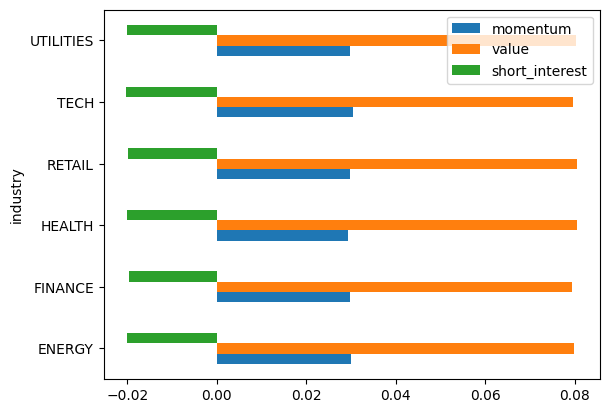

In [406]:
means.plot(kind='barh')

In [412]:
means = df.groupby([industries, ccy]).mean()
means

momentum     value  short_interest
industry  currency                                    
ENERGY    AUD       0.029400  0.081319       -0.019956
          CAD       0.029249  0.078478       -0.019821
          EUR       0.030595  0.078524       -0.020558
          GBP       0.030071  0.079331       -0.019522
          JPY       0.029742  0.082014       -0.020715
          USD       0.030952  0.079556       -0.020668
FINANCE   AUD       0.029511  0.079559       -0.019057
          CAD       0.029247  0.080787       -0.019333
          EUR       0.030101  0.078733       -0.019591
          GBP       0.029815  0.078899       -0.020197
          JPY       0.030069  0.078652       -0.020301
          USD       0.029763  0.080843       -0.019126
HEALTH    AUD       0.030215  0.081701       -0.020070
          CAD       0.029987  0.079427       -0.019139
          EUR       0.029368  0.080586       -0.020337
          GBP       0.029150  0.080830       -0.021127
          JPY       0.028067  0.080002       -0.020441
          USD       0.029300  0.081170       -0.020177
RETAIL    AUD       0.029186  0.081063       -0.019227
          CAD       0.029390  0.079210       -0.019252
          EUR       0.030862  0.081414       -0.020204
          GBP       0.029719  0.079537       -0.020591
          JPY       0.029550  0.080620       -0.019452
          USD       0.029713  0.080606       -0.020205
TECH      AUD       0.030517  0.078659       -0.021391
          CAD       0.030967  0.080317       -0.017793
          EUR       0.030654  0.081792       -0.020263
          GBP       0.029879  0.080142       -0.021435
          JPY       0.030580  0.079509       -0.018501
          USD       0.030343  0.078129       -0.021539
UTILITIES AUD       0.031616  0.078533       -0.021712
          CAD       0.029524  0.082269       -0.018792
          EUR       0.031030  0.079177       -0.018715
          GBP       0.029174  0.082153       -0.022159
          JPY       0.028907  0.080529       -0.019929
          USD       0.029460  0.079536       -0.019499

In [444]:
normed = df.groupby([industries, ccy], dropna=False, group_keys=False).apply(
    lambda x: (x - x.mean()) / x.std()
)
normed

,momentum,value,short_interest
QWKIS,-1.364333,-0.975153,0.281089
ORMNU,-1.838752,-0.649806,-0.382728
QQAOJ,-1.255261,2.103964,-0.520313
OLYXN,0.044885,0.106870,1.613680
ICXAY,0.098981,0.017944,0.174792
...,...,...,...
HETSQ,-1.041718,-1.115436,1.005333
VYFRR,1.053241,-0.400395,-0.846458
XBRIX,-0.982935,-1.645684,-0.251741
MXYDY,-0.951748,-2.671560,-0.480760


In [441]:
normed.groupby([industries, ccy]).agg(['mean','std'])

momentum              value      short_interest     
                            mean  std          mean  std           mean  std
industry  currency                                                          
ENERGY    AUD       5.440093e-16  1.0 -3.930190e-15  1.0   2.053913e-16  1.0
          CAD      -4.013883e-16  1.0 -2.562053e-16  1.0  -9.735802e-16  1.0
          EUR       6.431637e-16  1.0 -1.868237e-15  1.0  -1.832825e-16  1.0
          GBP       1.960238e-16  1.0  2.018351e-15  1.0  -1.509209e-16  1.0
          JPY      -8.964023e-16  1.0  1.942890e-16  1.0   3.650308e-16  1.0
          USD      -1.295260e-16  1.0  1.040320e-15  1.0  -5.427757e-16  1.0
FINANCE   AUD       4.764707e-16  1.0 -2.026157e-15  1.0   2.518240e-16  1.0
          CAD      -4.758099e-16  1.0  3.584434e-15  1.0   4.202987e-16  1.0
          EUR      -4.200844e-16  1.0  2.130428e-16  1.0  -5.221049e-16  1.0
          GBP       5.586929e-16  1.0 -1.547150e-15  1.0   1.011735e-15  1.0
          JPY      -4.736952e-16  1.0  2.057613e-15  1.0  -4.366877e-16  1.0
          USD      -3.586874e-16  1.0 -6.068863e-16  1.0   2.690156e-16  1.0
HEALTH    AUD      -4.111937e-16  1.0 -2.195774e-15  1.0   9.868649e-17  1.0
          CAD      -6.527037e-16  1.0  7.245101e-15  1.0  -1.969751e-16  1.0
          EUR      -8.857649e-16  1.0 -1.544658e-15  1.0   6.275174e-17  1.0
          GBP      -2.467162e-16  1.0 -1.352827e-15  1.0   9.375217e-16  1.0
          JPY      -6.957398e-16  1.0  1.628327e-16  1.0  -1.760166e-16  1.0
          USD       5.633354e-16  1.0  4.128385e-15  1.0  -6.579099e-17  1.0
RETAIL    AUD      -7.031412e-17  1.0  1.454392e-15  1.0  -8.437695e-16  1.0
          CAD       1.816729e-16  1.0 -3.764665e-15  1.0   7.065056e-17  1.0
          EUR      -1.416995e-15  1.0 -1.836250e-15  1.0   1.086850e-15  1.0
          GBP      -5.423012e-16  1.0 -2.077398e-15  1.0  -2.903660e-16  1.0
          JPY      -4.780127e-16  1.0  1.825700e-15  1.0  -5.736152e-16  1.0
          USD      -4.440892e-16  1.0 -3.031763e-16  1.0  -1.451830e-16  1.0
TECH      AUD       6.008266e-16  1.0  1.900441e-15  1.0   2.089832e-16  1.0
          CAD       5.589399e-16  1.0  4.766302e-15  1.0   1.837611e-16  1.0
          EUR       2.960595e-16  1.0  2.203998e-15  1.0  -6.291264e-16  1.0
          GBP       1.283695e-16  1.0  1.533496e-15  1.0   2.012279e-16  1.0
          JPY      -7.612958e-16  1.0 -1.916456e-15  1.0   6.238396e-16  1.0
          USD       6.125368e-16  1.0  7.580143e-16  1.0  -9.226336e-16  1.0
UTILITIES AUD       2.775558e-17  1.0  3.677614e-16  1.0  -1.873501e-16  1.0
          CAD       1.110223e-17  1.0  2.234324e-15  1.0  -4.385381e-16  1.0
          EUR       4.605370e-16  1.0  3.729527e-15  1.0  -2.323244e-16  1.0
          GBP       1.069104e-15  1.0  1.073216e-15  1.0  -3.587665e-16  1.0
          JPY       3.182639e-16  1.0  7.708533e-16  1.0  -9.177844e-16  1.0
          USD      -3.449622e-16  1.0  1.197455e-15  1.0  -4.480543e-16  1.0

In [ ]:
normed.groupby(level=[0,1]).agg(['mean','std'])

momentum              value      short_interest     
                            mean  std          mean  std           mean  std
industry  currency                                                          
ENERGY    AUD       5.440093e-16  1.0 -3.930190e-15  1.0   2.053913e-16  1.0
          CAD      -4.013883e-16  1.0 -2.562053e-16  1.0  -9.735802e-16  1.0
          EUR       6.431637e-16  1.0 -1.868237e-15  1.0  -1.832825e-16  1.0
          GBP       1.960238e-16  1.0  2.018351e-15  1.0  -1.509209e-16  1.0
          JPY      -8.964023e-16  1.0  1.942890e-16  1.0   3.650308e-16  1.0
          USD      -1.295260e-16  1.0  1.040320e-15  1.0  -5.427757e-16  1.0
FINANCE   AUD       4.764707e-16  1.0 -2.026157e-15  1.0   2.518240e-16  1.0
          CAD      -4.758099e-16  1.0  3.584434e-15  1.0   4.202987e-16  1.0
          EUR      -4.200844e-16  1.0  2.130428e-16  1.0  -5.221049e-16  1.0
          GBP       5.586929e-16  1.0 -1.547150e-15  1.0   1.011735e-15  1.0
          JPY      -4.736952e-16  1.0  2.057613e-15  1.0  -4.366877e-16  1.0
          USD      -3.586874e-16  1.0 -6.068863e-16  1.0   2.690156e-16  1.0
HEALTH    AUD      -4.111937e-16  1.0 -2.195774e-15  1.0   9.868649e-17  1.0
          CAD      -6.527037e-16  1.0  7.245101e-15  1.0  -1.969751e-16  1.0
          EUR      -8.857649e-16  1.0 -1.544658e-15  1.0   6.275174e-17  1.0
          GBP      -2.467162e-16  1.0 -1.352827e-15  1.0   9.375217e-16  1.0
          JPY      -6.957398e-16  1.0  1.628327e-16  1.0  -1.760166e-16  1.0
          USD       5.633354e-16  1.0  4.128385e-15  1.0  -6.579099e-17  1.0
RETAIL    AUD      -7.031412e-17  1.0  1.454392e-15  1.0  -8.437695e-16  1.0
          CAD       1.816729e-16  1.0 -3.764665e-15  1.0   7.065056e-17  1.0
          EUR      -1.416995e-15  1.0 -1.836250e-15  1.0   1.086850e-15  1.0
          GBP      -5.423012e-16  1.0 -2.077398e-15  1.0  -2.903660e-16  1.0
          JPY      -4.780127e-16  1.0  1.825700e-15  1.0  -5.736152e-16  1.0
          USD      -4.440892e-16  1.0 -3.031763e-16  1.0  -1.451830e-16  1.0
TECH      AUD       6.008266e-16  1.0  1.900441e-15  1.0   2.089832e-16  1.0
          CAD       5.589399e-16  1.0  4.766302e-15  1.0   1.837611e-16  1.0
          EUR       2.960595e-16  1.0  2.203998e-15  1.0  -6.291264e-16  1.0
          GBP       1.283695e-16  1.0  1.533496e-15  1.0   2.012279e-16  1.0
          JPY      -7.612958e-16  1.0 -1.916456e-15  1.0   6.238396e-16  1.0
          USD       6.125368e-16  1.0  7.580143e-16  1.0  -9.226336e-16  1.0
UTILITIES AUD       2.775558e-17  1.0  3.677614e-16  1.0  -1.873501e-16  1.0
          CAD       1.110223e-17  1.0  2.234324e-15  1.0  -4.385381e-16  1.0
          EUR       4.605370e-16  1.0  3.729527e-15  1.0  -2.323244e-16  1.0
          GBP       1.069104e-15  1.0  1.073216e-15  1.0  -3.587665e-16  1.0
          JPY       3.182639e-16  1.0  7.708533e-16  1.0  -9.177844e-16  1.0
          USD      -3.449622e-16  1.0  1.197455e-15  1.0  -4.480543e-16  1.0